# 1. Introducción

Basado en los problemas cotidianos de un cientifico, en donde no siempre puede manejarse con numeros exactos o con funciones realmente complejas, decidi generar este algoritmo que permite calcular la aproximacion de una funcion mediante el teorema de Taylor. El algoritmo planteado por el famoso matematico tiene la siguiente definición:

> 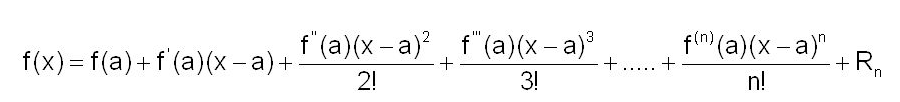

# 2. Armado del Ambiente
No se requieren ejecuciones previas para el funcionamiento de los desarrollos.

# 3. Desarrollo

In [ ]:
# --------------------------------------------
#@title 3.1 Parámetros de ejecución { vertical-output: true }

x0 =   1 #@param {type: "number"}
ev_in = 0.8 #@param {type: "number"}
func = 'cos(x)*sin(x)+100*x' #@param {type: "string"}
grado =   100 #@param {type: "number"}
# --------------------------------------------
%tensorflow_version 2.x
import tensorflow as tf
import timeit
from sympy import Derivative, diff, simplify
from sympy import *

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nUsted no ha ejecutado el modulo de "Armado de Ambiente" o no ha configurado el entorno de ejecución como GPU')
  raise SystemError('Dispositivo GPU no encontrado')

x = symbols('x')
fx = eval( func )

coef = []

def cpu():
  with tf.device('/cpu:0'):
    coef.append( fx.subs(x, x0) )
    result = fx.subs(x, x0)

    for i in range(1, grado):
      derivada = ( Derivative(fx, x, i).doit() ) # Derivo la fc 
      derivada_ev = derivada.subs(x, x0) # Evaluo la derivada en x0
      factor = ( derivada_ev * ( x - x0 )**i ) / factorial(i) # Genero un factor de Taylor con los resultados obtenidos
      factor_ev = factor.subs(x, ev_in) # Evaluo el factor de Taylor en el valor a aproximar
      result += factor_ev

    return result

def gpu():
  with tf.device('/device:GPU:0'):
    coef.append( fx.subs(x, x0) )
    result = fx.subs(x, x0)

    for i in range(1, grado):
      derivada = ( Derivative(fx, x, i).doit() ) # Derivo la fc 
      derivada_ev = derivada.subs(x, x0) # Evaluo la derivada en x0
      factor = ( derivada_ev * ( x - x0 )**i ) / factorial(i) # Genero un factor de Taylor con los resultados obtenidos
      factor_ev = factor.subs(x, ev_in) # Evaluo el factor de Taylor en el valor a aproximar
      result += factor_ev

    return result
  
print( "RESULTADO TAYLOR CPU: ", cpu())
print( "RESULTADO TAYLOR GPU: ", gpu())


print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('Diferencia GPU vs CPU: {}x'.format(int(cpu_time/gpu_time)))

# 4. Tabla de Pasos
En esta tabla de pasos podemos notar que hay filas en la que el procesador no esta definido. Esto pasa porque estamos usando TensorFlow. El desarrollo tiene implementaciones de CPU y GPU por lo que, en los bloques en donde no definimos explicitamente un contexto, no podemos definir que procesador ejecutará la tarea.

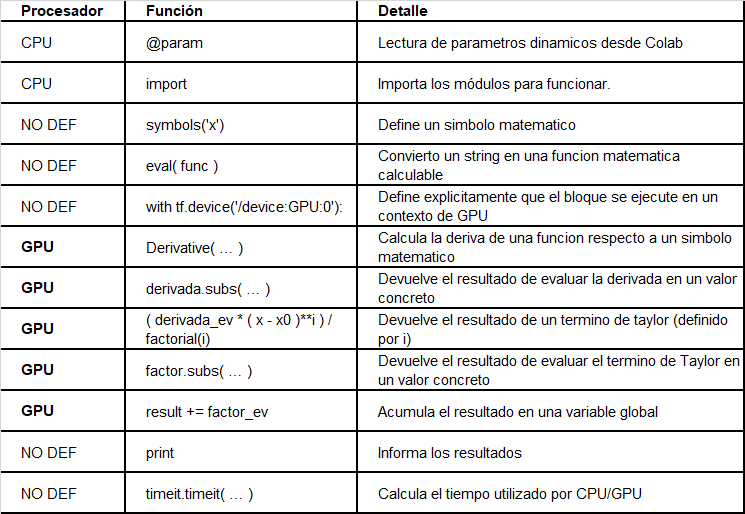

# 5. Conclusiones
Podemos notar que utilizar TensorFlow genera resultados de rendimiento inciertos ya que si no definimos el procesador que ejecutará cada tarea, esta puede ser ejecutada tanto por CPU como por GPU segun TensorFlow. Como beneficioso encontramos que el uso de un codigo python para CPU puede ser el mismo que para un codigo para GPU.
TensorFlow esta destinado para el entrenamiento de redes neuronales y/o para el uso de TPU, por lo que podes decir que no estamos haciendo un buen uso de TensorFlow en este notebook.


Puede notarse la gran variedad de librerias y funciones que brinda python. Por ejemplo, la función "Derivate" no es encontrada para C/C++. Python tiene un gran poder sobre funciones matematicas ya que es una de las bases de la inteligencia artifical.


No creo que haya una mejora a implementar sobre el desarrollo. Para ver el realmente el poder de TensorFlow junto con Python, habría que generar un codigo completamente distinto en mi opinion.

# 6. Bibliografía

*   Python basico: [Github](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb)
*   Programacion paralela y distribuida: [SODIUM](http://so-unlam.com.ar/material-clase/HPC/Programación%20Paralela%20y%20Distribuida.pdf)
*   Introducción a Google Colab: [Github](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/google_colab_tutorial.pdf)
*   TensorFlow: [TensorFlow](https://www.tensorflow.org/guide/gpu)
*   Lo que necesitas saber sobre TensorFlow: [Puentes Digitales](https://puentesdigitales.com/2018/02/14/todo-lo-que-necesitas-saber-sobre-tensorflow-la-plataforma-para-inteligencia-artificial-de-google/)
*   Documentación de Sympy: [Sympy](https://docs.sympy.org/latest/index.html)
*   Teorema de Taylor: [Wikipedia](https://es.wikipedia.org/wiki/Teorema_de_Taylor)
